In [19]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [22]:
ps = PorterStemmer()
#creating corpus
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)



In [26]:
y = pd.get_dummies(df['label'],drop_first = True)


In [27]:
y.values

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [30]:
count_v = CountVectorizer(max_features=5000)
x= count_v.fit_transform(corpus).toarray()

x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
x.shape

(5572, 5000)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [40]:
from sklearn.naive_bayes import MultinomialNB
naivebaye = MultinomialNB().fit(x_train,y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
y_pred = naivebaye.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_metrix = confusion_matrix(y_test,y_pred)
confusion_metrix

array([[946,   9],
       [  8, 152]])

Text(0.5, 1.0, 'confusion matrix for spam or ham classification')

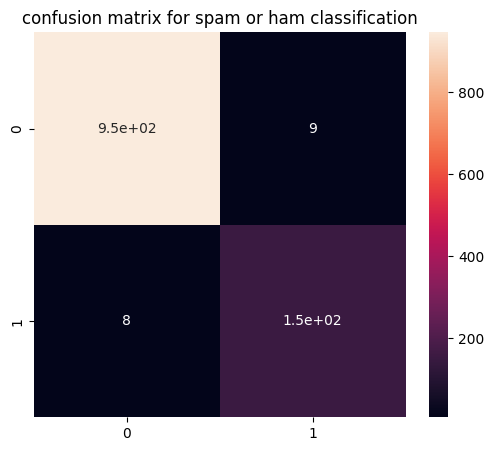

In [49]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_metrix,annot=True)
plt.title('confusion matrix for spam or ham classification')


In [51]:


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9847533632286996
